In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dataset_small.csv")
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [ ]:
df.shape

(58645, 112)

In [ ]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


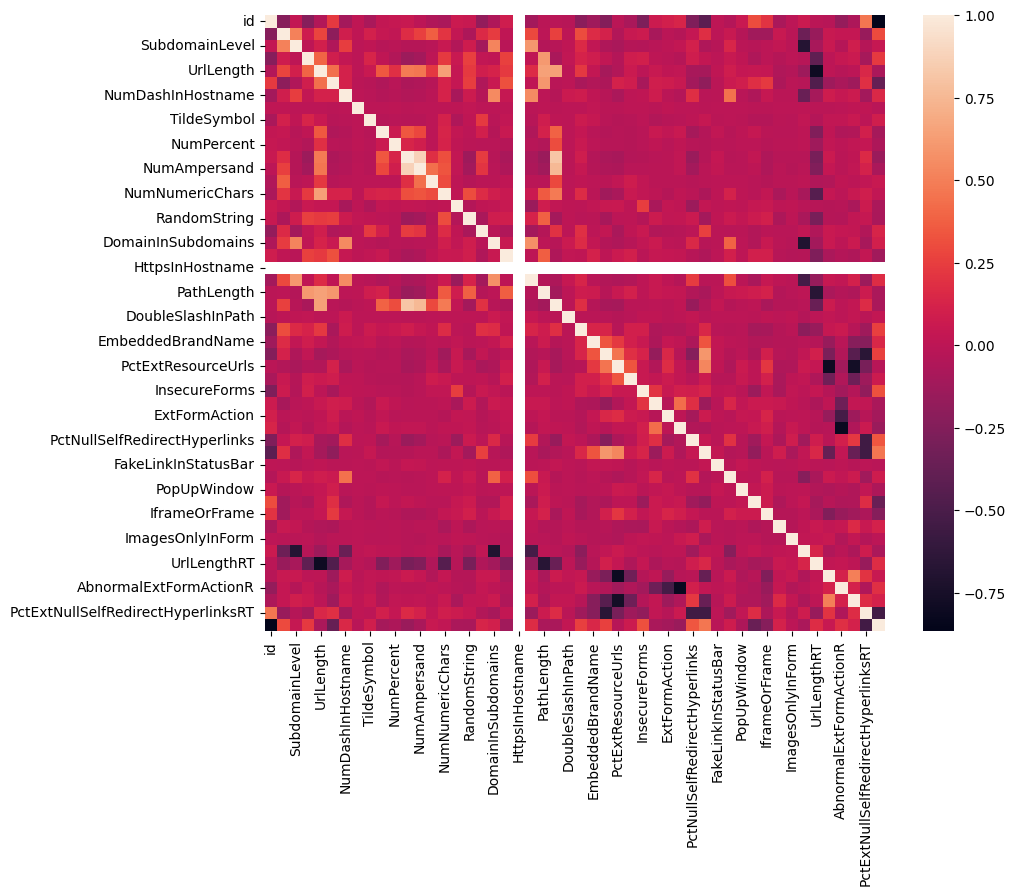

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,0,0,0,0,0,0,0,...,1,2,1,14388,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,4,2,592,0,0,0,0,0,0
2,3,0,0,3,0,0,0,0,0,0,...,1,2,1,14389,1,0,0,0,0,1
3,3,0,0,1,0,0,0,0,0,0,...,1,2,2,1070,0,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,2,2,1,298,0,-1,0,0,0,0


In [ ]:
y=df['phishing']
X=df.drop('phishing', axis=1)
X.shape, y.shape

((58645, 111), (58645,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
X_train.shape, X_test.shape

((46916, 111), (11729, 111))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

ML_Model = []
acc_train = []
acc_test = []
precision_test = []
recall_test = []
f1_test = []
confusion_matrices = []

def storeResults(model, a, b, precision, recall, f1, cm):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    precision_test.append(round(precision, 3))
    recall_test.append(round(recall, 3))
    f1_test.append(round(f1, 3))
    confusion_matrices.append(cm)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)
precision_tree = precision_score(y_test, y_test_tree)
recall_tree = recall_score(y_test, y_test_tree)
f1_tree = f1_score(y_test, y_test_tree)
cm_tree = confusion_matrix(y_test, y_test_tree)

print("Decision Tree: Accuracy for training data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy for testing data: {:.3f}".format(acc_test_tree))
print("Decision Tree: Precision: {:.3f}".format(precision_tree))
print("Decision Tree: Recall: {:.3f}".format(recall_tree))
print("Decision Tree: F1 Score: {:.3f}".format(f1_tree))
print("Decision Tree: Confusion Matrix:\n", cm_tree)

# Store the results
storeResults("Decision Tree", acc_train_tree, acc_test_tree, precision_tree, recall_tree, f1_tree, cm_tree)


Decision Tree: Accuracy for training data: 0.901
Decision Tree: Accuracy for testing data: 0.896
Decision Tree: Precision: 0.895
Decision Tree: Recall: 0.909
Decision Tree: F1 Score: 0.902
Decision Tree: Confusion Matrix:
 [[4933  656]
 [ 561 5579]]


In [ ]:
import pandas as pd

# Assuming you have the following variables:
# tree.feature_importances_: The feature importances from your decision tree model
# X_train.columns: The column names of your feature matrix (X_train)

# Create a DataFrame to store the feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate percentages
total_importance = feature_importance_df['Importance'].sum()
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / total_importance) * 100

# Display the tabular data
print(feature_importance_df)


                    Feature  Importance  Percentage
57         directory_length    0.659272   65.927234
100  time_domain_activation    0.188308   18.830807
56    qty_percent_directory    0.055836    5.583628
19           qty_dot_domain    0.039705    3.970499
97            time_response    0.015944    1.594362
..                      ...         ...         ...
35       qty_percent_domain    0.000000    0.000000
34        qty_dollar_domain    0.000000    0.000000
33       qty_hashtag_domain    0.000000    0.000000
32      qty_asterisk_domain    0.000000    0.000000
110           url_shortened    0.000000    0.000000

[111 rows x 3 columns]


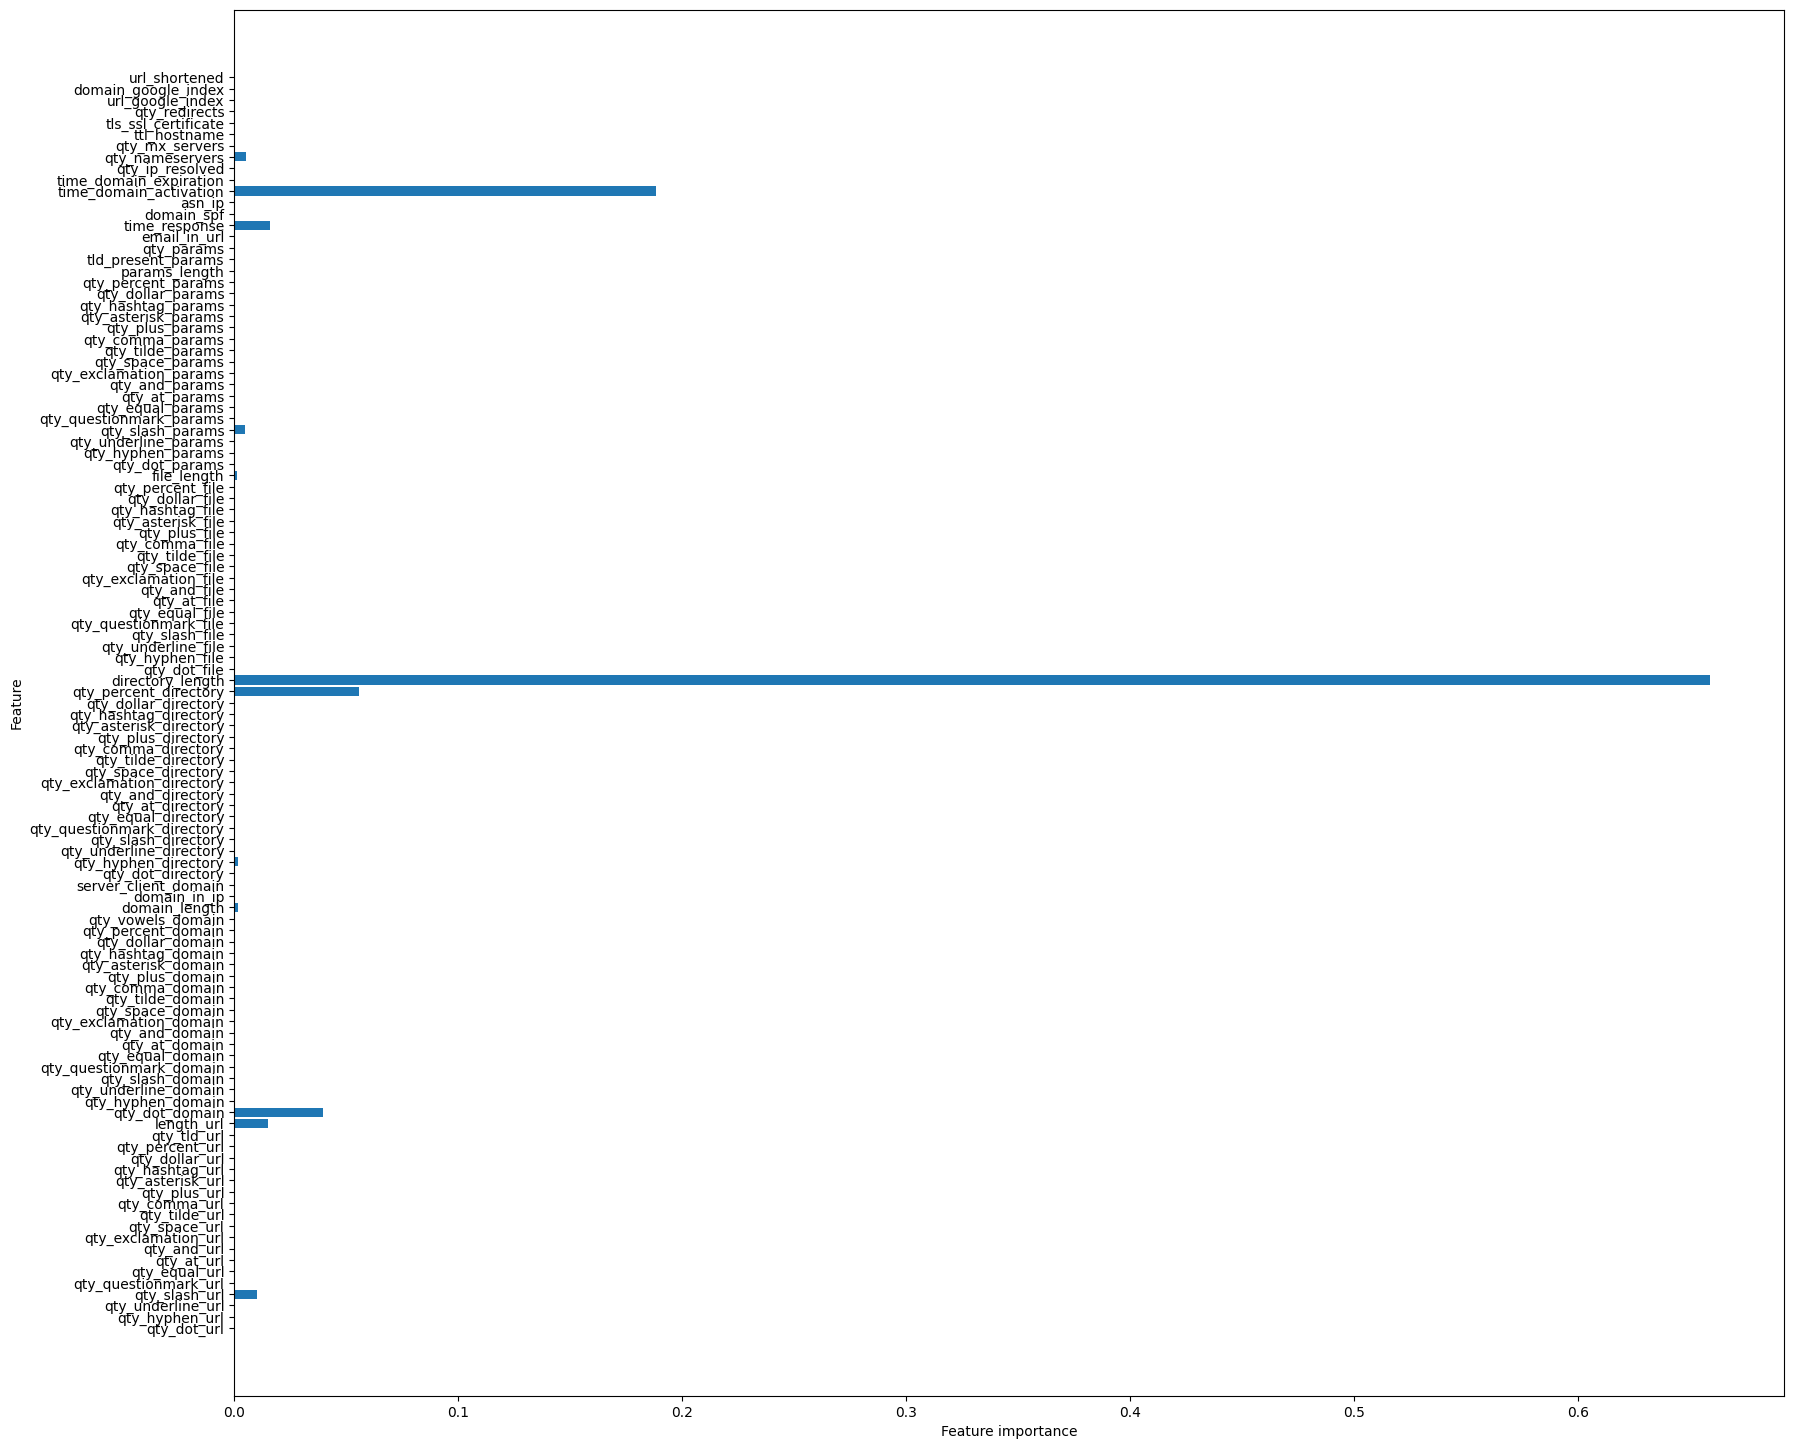

In [ ]:
plt.figure(figsize=(20,18))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
guass= GaussianNB()
guass.fit(X_train, y_train)

y_test_guass = guass.predict(X_test)
y_train_guass = guass.predict(X_train)
acc_train_guass = accuracy_score(y_train, y_train_guass)
acc_test_guass = accuracy_score(y_test, y_test_guass)
precision_guass = precision_score(y_test, y_test_guass)
recall_guass = recall_score(y_test, y_test_guass)
f1_guass = f1_score(y_test, y_test_guass)
cm_guass = confusion_matrix(y_test, y_test_guass)

print("Naive Bayes: Accuracy for training data: {:.3f}".format(acc_train_guass))
print("Naive Bayes: Accuracy for testing data: {:.3f}".format(acc_test_guass))
print("Naive Bayes: Precision: {:.3f}".format(precision_guass))
print("Naive Bayes: Recall: {:.3f}".format(recall_guass))
print("Naive Bayes: F1 Score: {:.3f}".format(f1_guass))
print("Naive Bayes: Confusion Matrix:\n", cm_guass)

# Store the results
storeResults("Naive Bayes", acc_train_guass, acc_test_guass, precision_guass, recall_guass, f1_guass, cm_guass)


Naive Bayes: Accuracy for training data: 0.723
Naive Bayes: Accuracy for testing data: 0.723
Naive Bayes: Precision: 0.921
Naive Bayes: Recall: 0.515
Naive Bayes: F1 Score: 0.661
Naive Bayes: Confusion Matrix:
 [[5316  273]
 [2976 3164]]


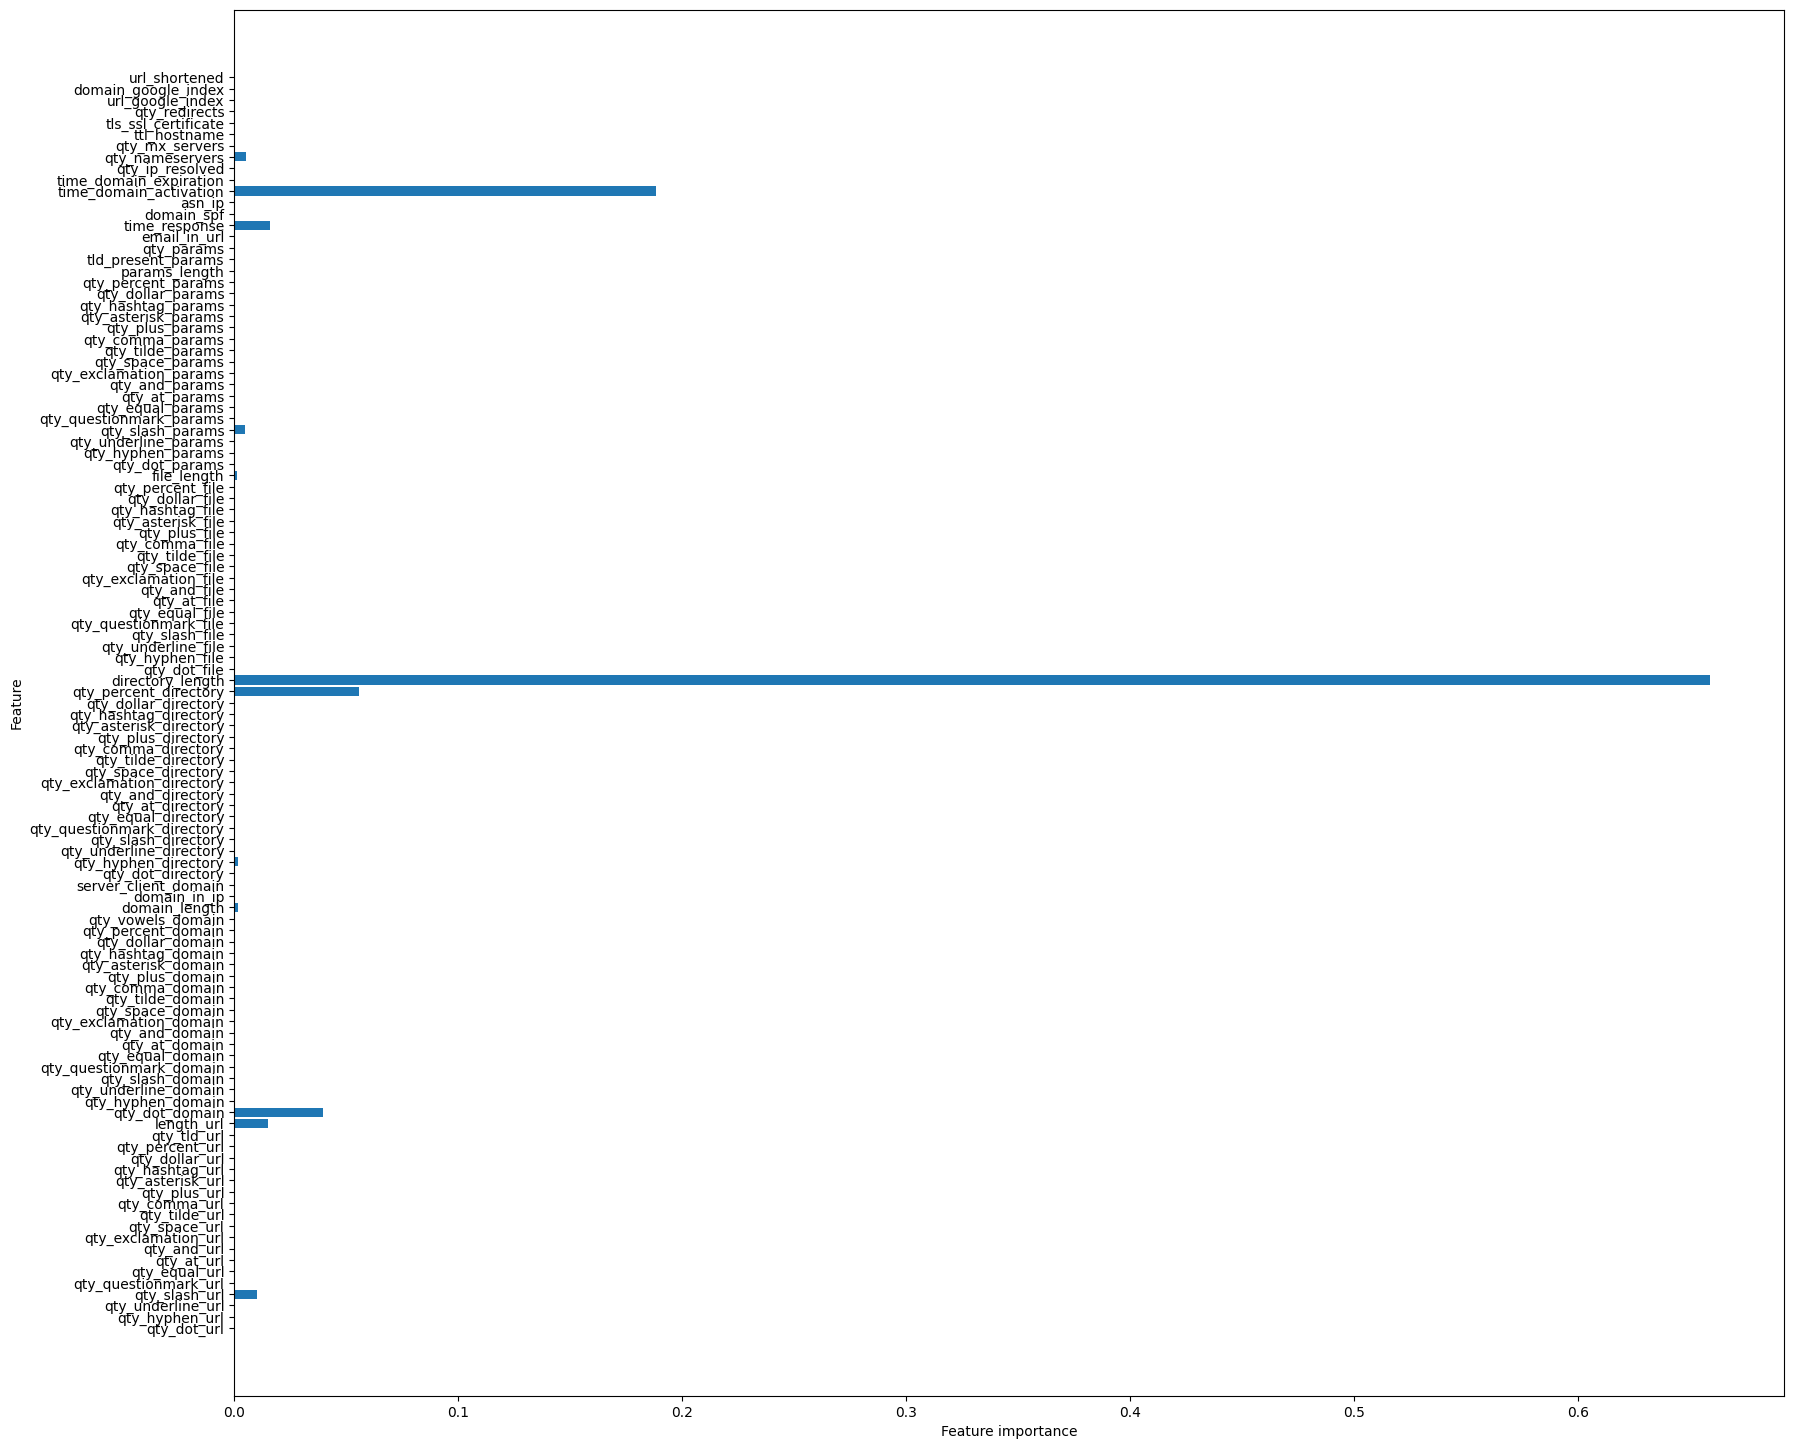

In [ ]:
plt.figure(figsize=(20,18))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)

y_test_logic = logic.predict(X_test)
y_train_logic = logic.predict(X_train)
acc_train_logic = accuracy_score(y_train, y_train_logic)
acc_test_logic = accuracy_score(y_test, y_test_logic)
precision_logic = precision_score(y_test, y_test_logic)
recall_logic = recall_score(y_test, y_test_logic)
f1_logic = f1_score(y_test, y_test_logic)
cm_logic = confusion_matrix(y_test, y_test_logic)

print("Logical Regression: Accuracy for training data: {:.3f}".format(acc_train_logic))
print("Logical Regression: Accuracy for testing data: {:.3f}".format(acc_test_logic))
print("Logical Regression: Precision: {:.3f}".format(precision_logic))
print("Logical Regression: Recall: {:.3f}".format(recall_logic))
print("Logical Regression: F1 Score: {:.3f}".format(f1_logic))
print("Logical Regression: Confusion Matrix:\n", cm_logic)

# Store the results
storeResults("Logical Regression", acc_train_logic, acc_test_logic, precision_logic, recall_logic, f1_logic, cm_logic)


Logical Regression: Accuracy for training data: 0.856
Logical Regression: Accuracy for testing data: 0.856
Logical Regression: Precision: 0.844
Logical Regression: Recall: 0.889
Logical Regression: F1 Score: 0.866
Logical Regression: Confusion Matrix:
 [[4579 1010]
 [ 683 5457]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


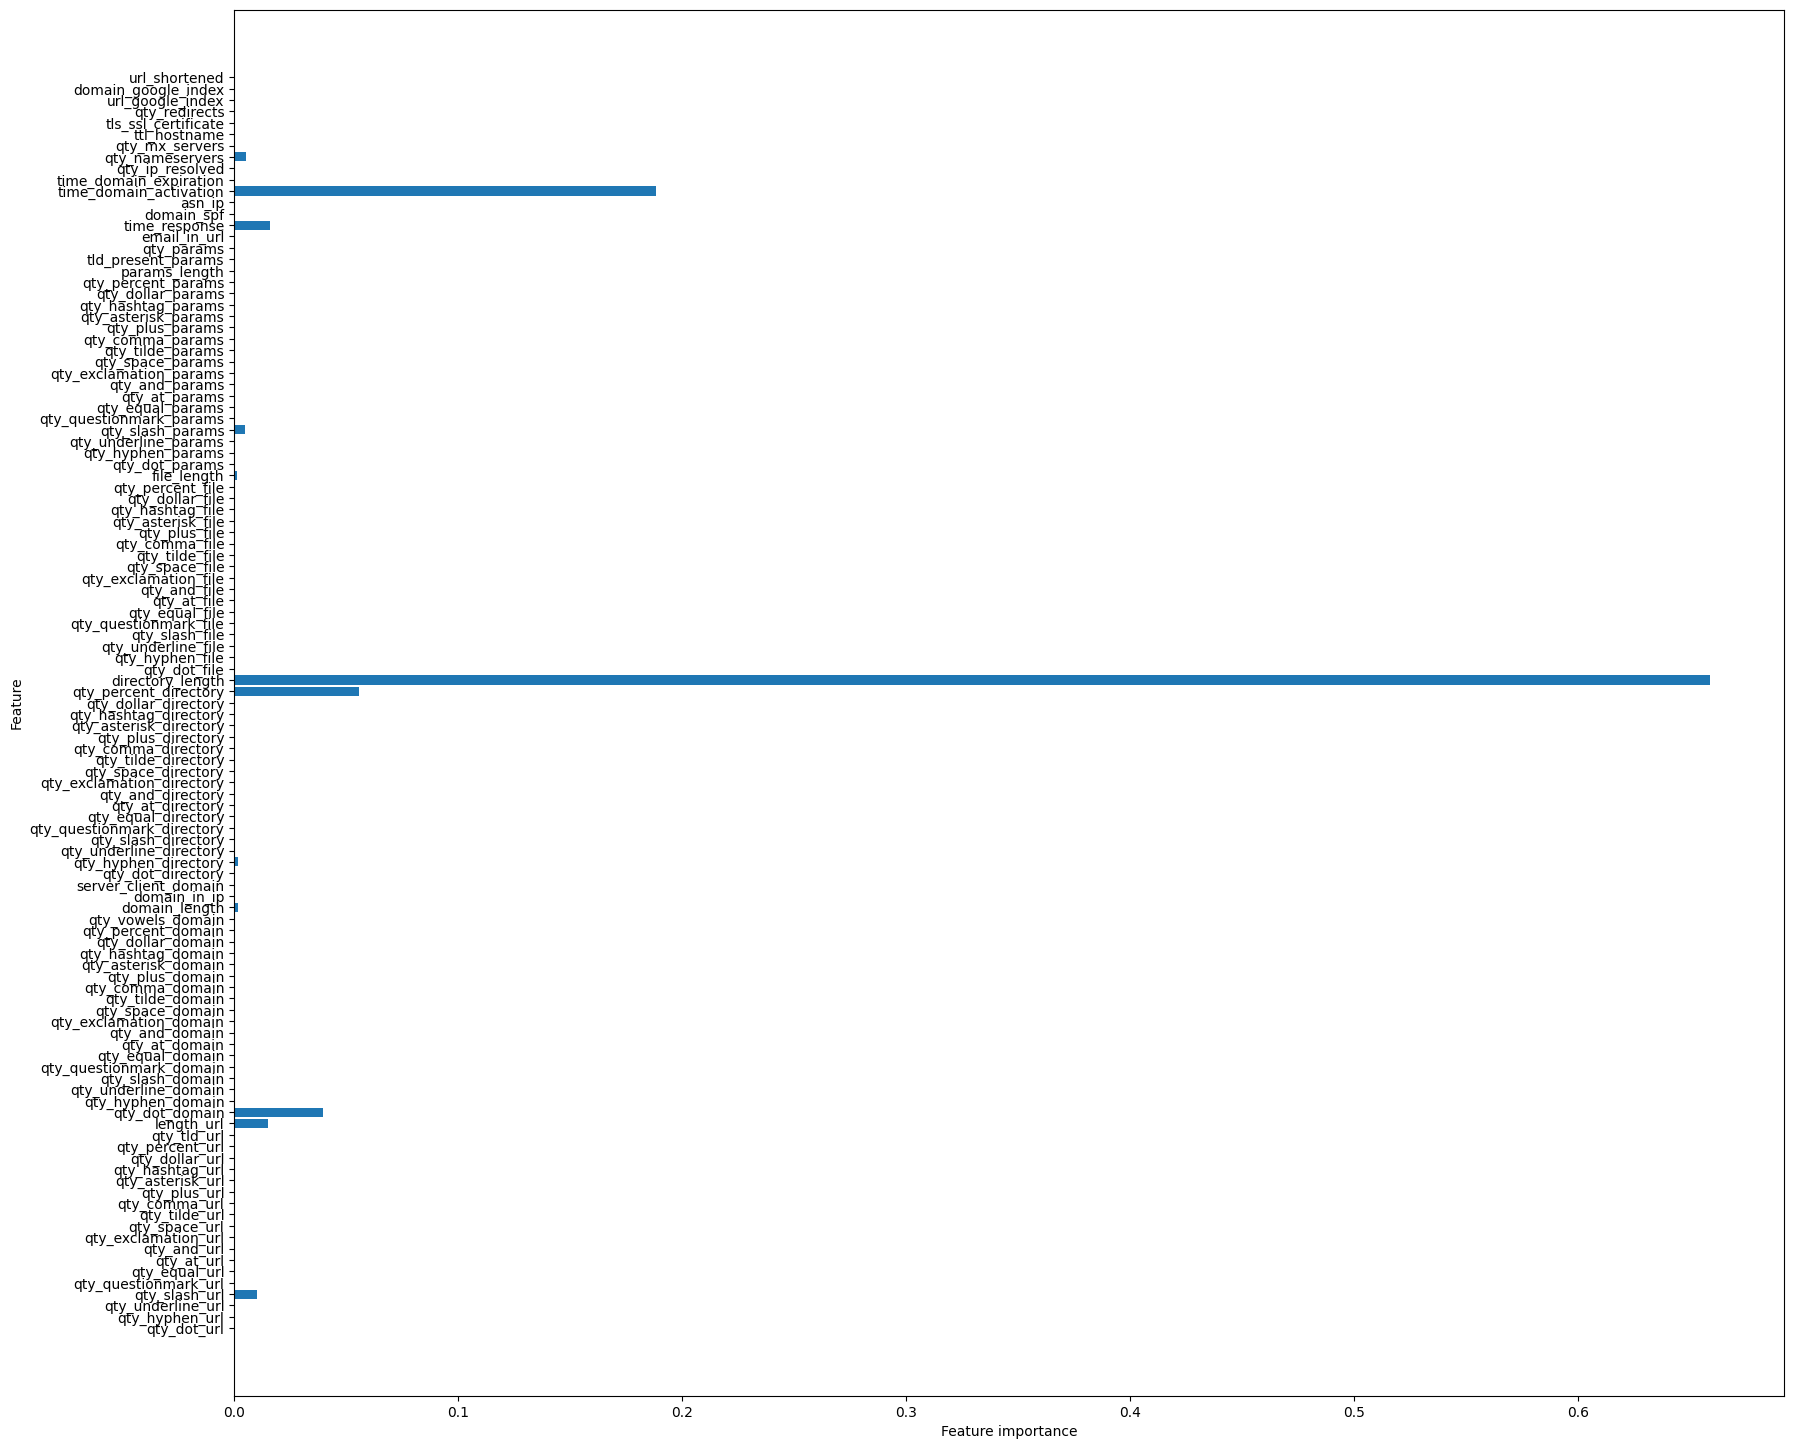

In [ ]:
plt.figure(figsize=(20,18))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)
acc_train_knn = accuracy_score(y_train, y_train_knn)
acc_test_knn = accuracy_score(y_test, y_test_knn)
precision_knn = precision_score(y_test, y_test_knn)
recall_knn = recall_score(y_test, y_test_knn)
f1_knn = f1_score(y_test, y_test_knn)
cm_knn = confusion_matrix(y_test, y_test_knn)

print("knn: Accuracy for training data: {:.3f}".format(acc_train_knn))
print("knn: Accuracy for testing data: {:.3f}".format(acc_test_knn))
print("knn: Precision: {:.3f}".format(precision_knn))
print("knn: Recall: {:.3f}".format(recall_knn))
print("knn: F1 Score: {:.3f}".format(f1_knn))
print("knn: Confusion Matrix:\n", cm_knn)

# Store the results
storeResults("knn", acc_train_knn, acc_test_knn, precision_knn, recall_knn, f1_knn, cm_knn)


knn: Accuracy for training data: 0.895
knn: Accuracy for testing data: 0.853
knn: Precision: 0.849
knn: Recall: 0.873
knn: F1 Score: 0.861
knn: Confusion Matrix:
 [[4638  951]
 [ 778 5362]]


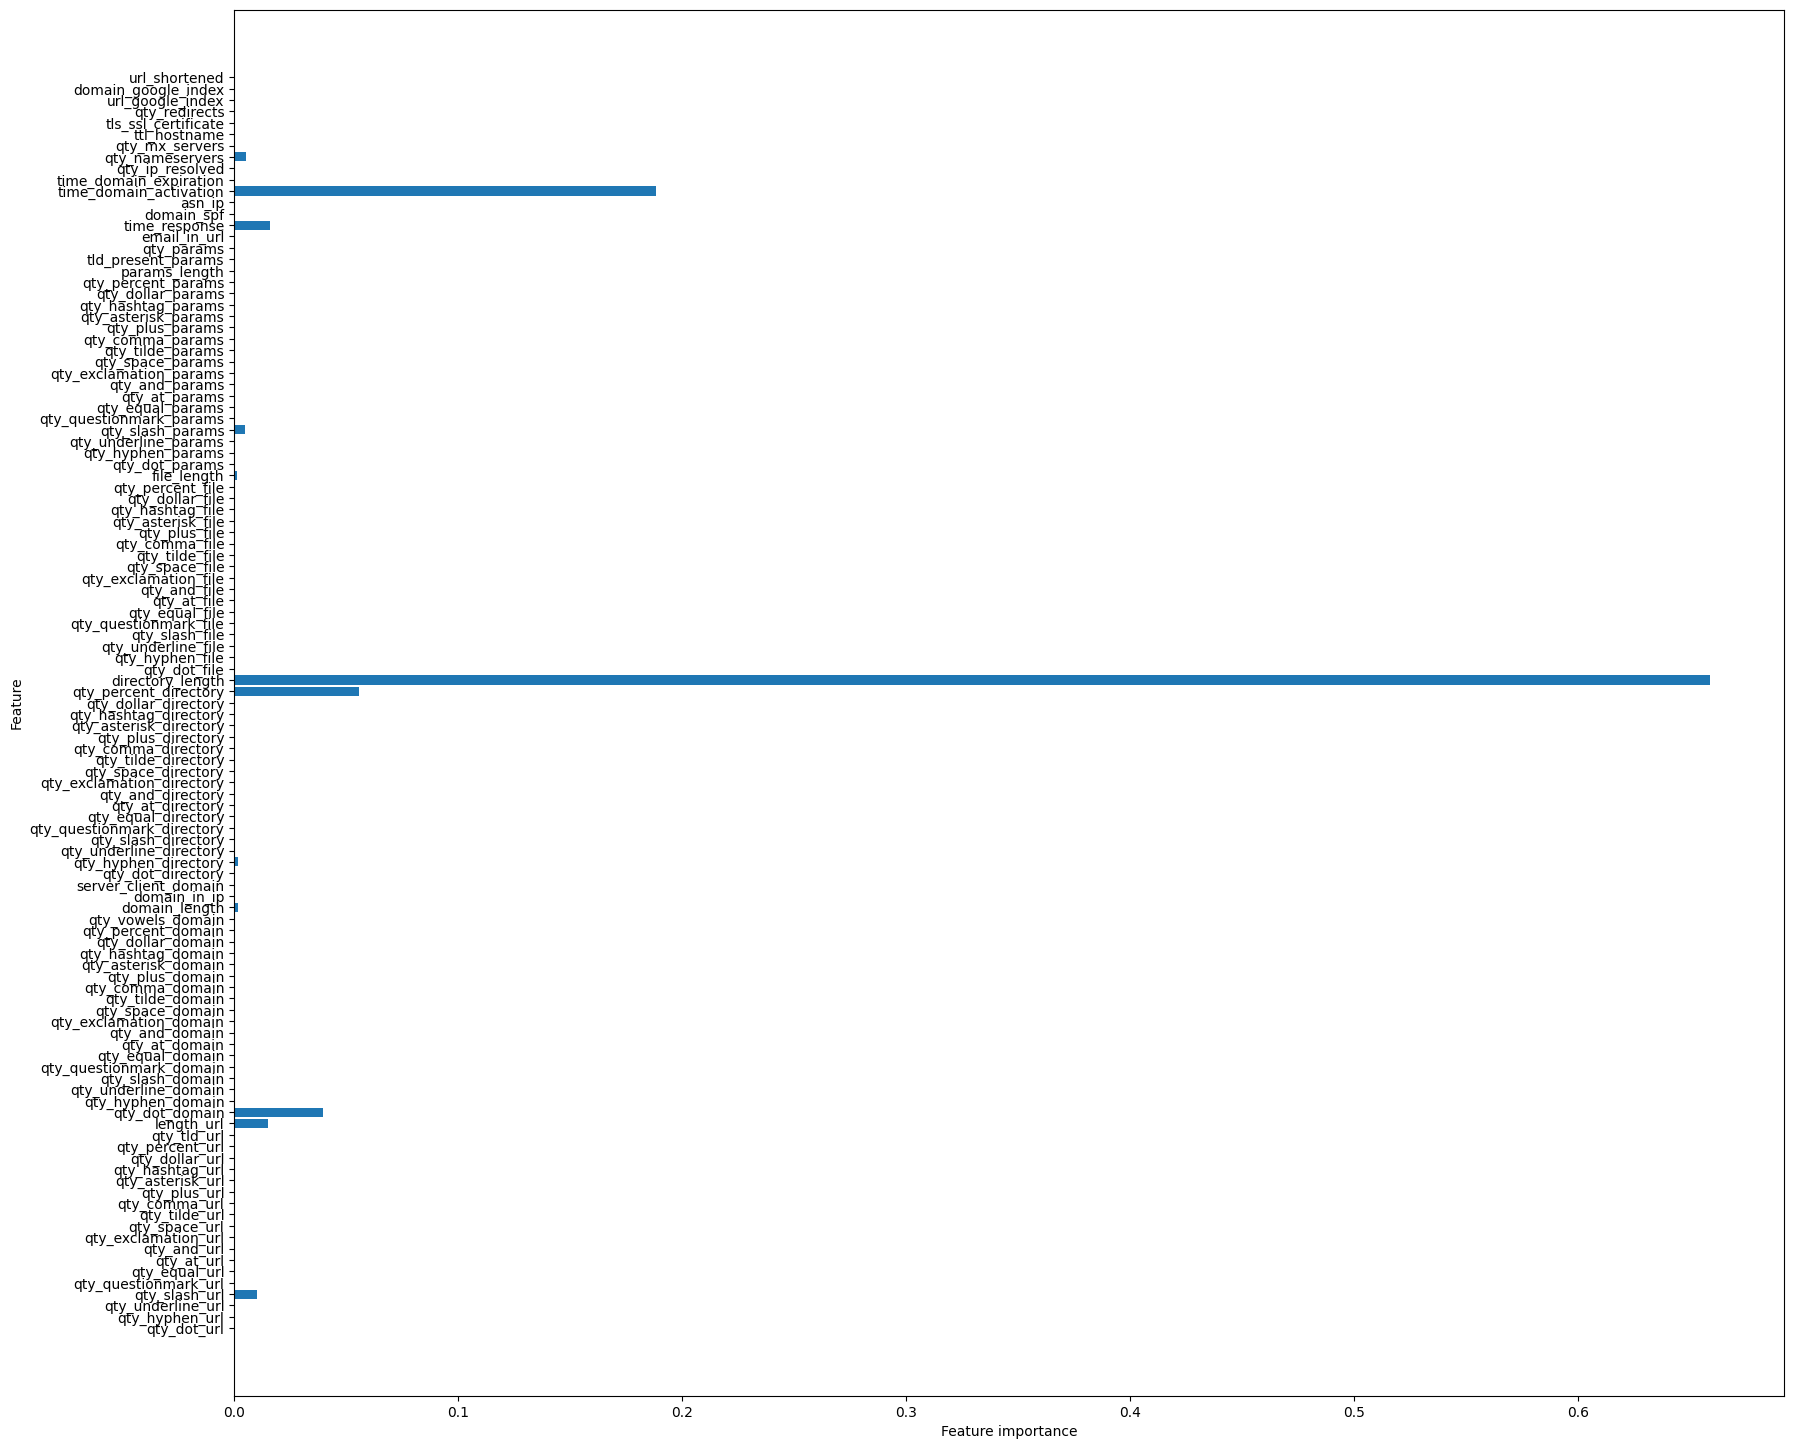

In [ ]:
plt.figure(figsize=(20,18))
n_features= X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Assuming you have stored results in the lists as described in your code

for i in range(len(ML_Model)):
    print(f"Model: {ML_Model[i]}")
    print(f"Accuracy (Train): {acc_train[i]}")
    print(f"Accuracy (Test): {acc_test[i]}")
    print(f"Precision: {precision_test[i]}")
    print(f"Recall: {recall_test[i]}")
    print(f"F1 Score: {f1_test[i]}")
    print(f"Confusion Matrix:\n{confusion_matrices[i]}\n")


Model: Decision Tree
Accuracy (Train): 0.901
Accuracy (Test): 0.896
Precision: 0.895
Recall: 0.909
F1 Score: 0.902
Confusion Matrix:
[[4933  656]
 [ 561 5579]]

Model: Naive Bayes
Accuracy (Train): 0.723
Accuracy (Test): 0.723
Precision: 0.921
Recall: 0.515
F1 Score: 0.661
Confusion Matrix:
[[5316  273]
 [2976 3164]]

Model: Naive Bayes
Accuracy (Train): 0.723
Accuracy (Test): 0.723
Precision: 0.921
Recall: 0.515
F1 Score: 0.661
Confusion Matrix:
[[5316  273]
 [2976 3164]]

Model: Logical Regression
Accuracy (Train): 0.856
Accuracy (Test): 0.856
Precision: 0.844
Recall: 0.889
F1 Score: 0.866
Confusion Matrix:
[[4579 1010]
 [ 683 5457]]

Model: Logical Regression
Accuracy (Train): 0.856
Accuracy (Test): 0.856
Precision: 0.844
Recall: 0.889
F1 Score: 0.866
Confusion Matrix:
[[4579 1010]
 [ 683 5457]]

Model: knn
Accuracy (Train): 0.895
Accuracy (Test): 0.853
Precision: 0.849
Recall: 0.873
F1 Score: 0.861
Confusion Matrix:
[[4638  951]
 [ 778 5362]]

